# *Lab 9: Markov Chain Monte Carlo*

##*Importing the packages*

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as ss
from tqdm import tqdm
from ast import literal_eval
import random
from collections import Counter
import copy
import seaborn as sns
sns.set_style("whitegrid")

#*Question 2:*

##*Defining the function to generate a feasible permutation and to obtain feasible permutations over multiple runs*

In [13]:
def generate_permut(n,a):
    array = np.arange(1,n+1)
    random_permut = np.random.permutation(array)
    while np.dot(array.T, random_permut) <=a:
        random_permut = np.random.permutation(array)
    return random_permut

def get_frequency(runs, a, n):
    frequency_dict = {}
    for i in range(runs):
        permutation = tuple(generate_permut(n,a))
        if permutation in frequency_dict.keys():
            frequency_dict[permutation] += 1
        else:
            frequency_dict[permutation] = 1
    return frequency_dict

##*Setting the parameters and number of runs*

In [14]:
n = 4
a = 14
runs = 10000
reqd_freq = get_frequency(runs,a,n)

##*Plotting the required histogram*

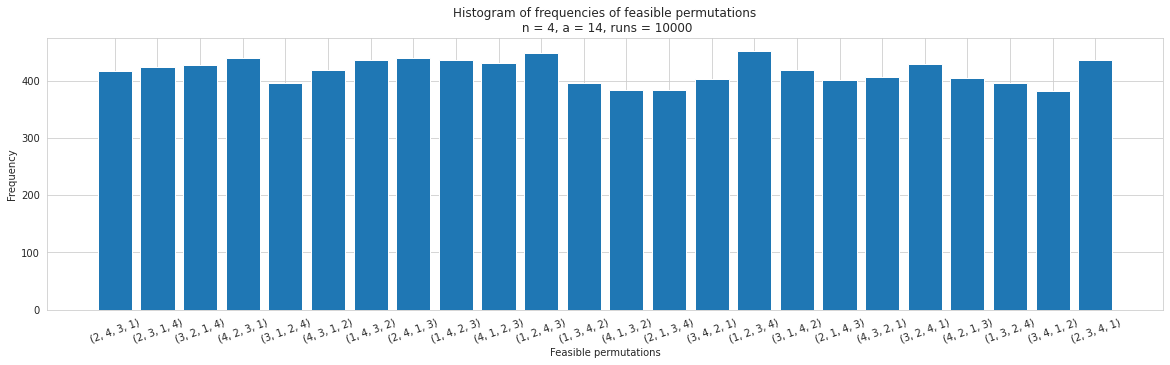

In [15]:
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 20)
plt.show()

#*Question 3:*

## *Function to obtain all feasible neighbors of a particular permutation*

In [16]:
def feasible_neighbors_mcmc(permut_state, a, n):
    feasible_neighbors = []
    array = np.arange(1,n+1)
    np.array(permut_state)
    for i in range(len(permut_state)):
        for j in range(len(permut_state)):
            temp = copy.deepcopy(permut_state)
            temp[i], temp[j] = temp[j], temp[i] 
            if ((np.dot(array.T, temp) > a) == True) and ((temp not in feasible_neighbors) == True) and (temp != permut_state):
                feasible_neighbors.append(temp)
    return feasible_neighbors

##*Storing neighbour counts of each feasible permutation in a dictionary "feasible_neighbors_list"*

In [17]:
feasible_neighbors_list = {}
feasible_permutations = reqd_freq.keys()

for state in feasible_permutations:
    feasible_neighbors_list[state] = feasible_neighbors_mcmc(list(state), a, n)

print(f"Total No. of Feasible Permutations: {len(feasible_neighbors_list.keys())}")
print()
for key in feasible_neighbors_list.keys():
    print(f"No. of Neighbours For The State: {key}: {len(feasible_neighbors_list[key])}")

Total No. of Feasible Permutations: 24

No. of Neighbours For The State: (2, 4, 3, 1): 6
No. of Neighbours For The State: (2, 3, 1, 4): 6
No. of Neighbours For The State: (3, 2, 1, 4): 6
No. of Neighbours For The State: (4, 2, 3, 1): 6
No. of Neighbours For The State: (3, 1, 2, 4): 6
No. of Neighbours For The State: (4, 3, 1, 2): 6
No. of Neighbours For The State: (1, 4, 3, 2): 6
No. of Neighbours For The State: (2, 4, 1, 3): 6
No. of Neighbours For The State: (1, 4, 2, 3): 6
No. of Neighbours For The State: (4, 1, 2, 3): 6
No. of Neighbours For The State: (1, 2, 4, 3): 6
No. of Neighbours For The State: (1, 3, 4, 2): 6
No. of Neighbours For The State: (4, 1, 3, 2): 6
No. of Neighbours For The State: (2, 1, 3, 4): 6
No. of Neighbours For The State: (3, 4, 2, 1): 6
No. of Neighbours For The State: (1, 2, 3, 4): 6
No. of Neighbours For The State: (3, 1, 4, 2): 6
No. of Neighbours For The State: (2, 1, 4, 3): 6
No. of Neighbours For The State: (4, 3, 2, 1): 6
No. of Neighbours For The Sta

#*Question 5:*

##*Function to generate feasible permutations using MCMC approach*

In [18]:
def mcmc_approach(a, n, iters):
    X_states = []
    X = generate_permut(n, a)
    for i in range(iters):
        nbs = feasible_neighbors_mcmc(list(X), a, n)
        X_next = random.choice(nbs)
        prob = 1/len(nbs)
        nbs_other = feasible_neighbors_mcmc(list(X_next), a, n)
        X_other = random.choice(nbs_other)
        prob_other = 1/len(nbs_other)

        unif = np.random.rand()
        if unif < min(1, prob_other/prob):
            X = X_next
        X_states.append(tuple(X))
    return X_states

In [19]:
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]

##*Plotting the required histogram for results obtained from MCMC*

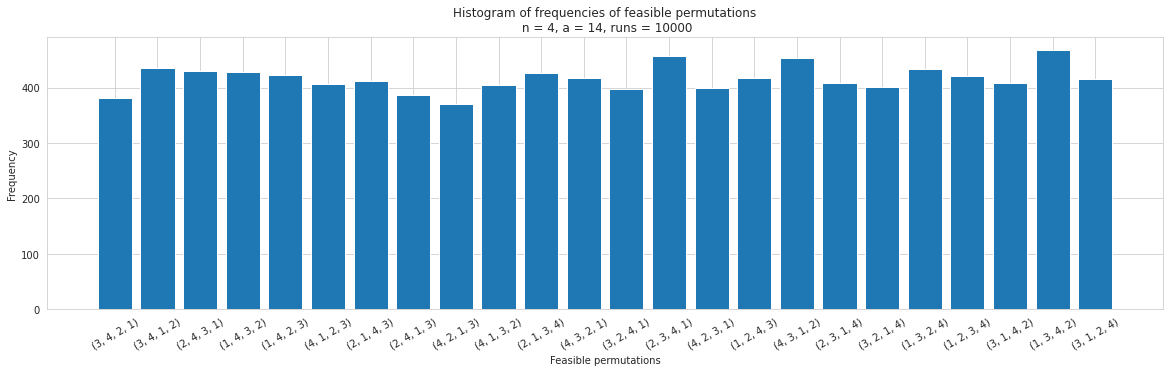

In [20]:
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()

###*Comments:*
>- We get very similar output for both the exact approach and the MCMC approach.
>- Both the histograms display uniform distribution across the different permutations.
>- For $n=4$ and $a=14$, all the 24 permutations come out to be feasible in both the cases.

#*We will now try to vary $n$ and $a$ and look at how the results change.*

####*Fixing $n = 4$ and varying $a$:*

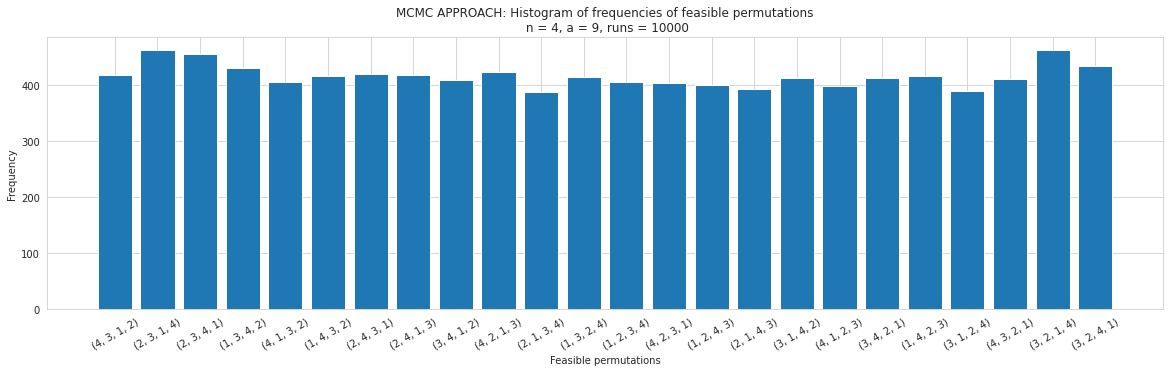

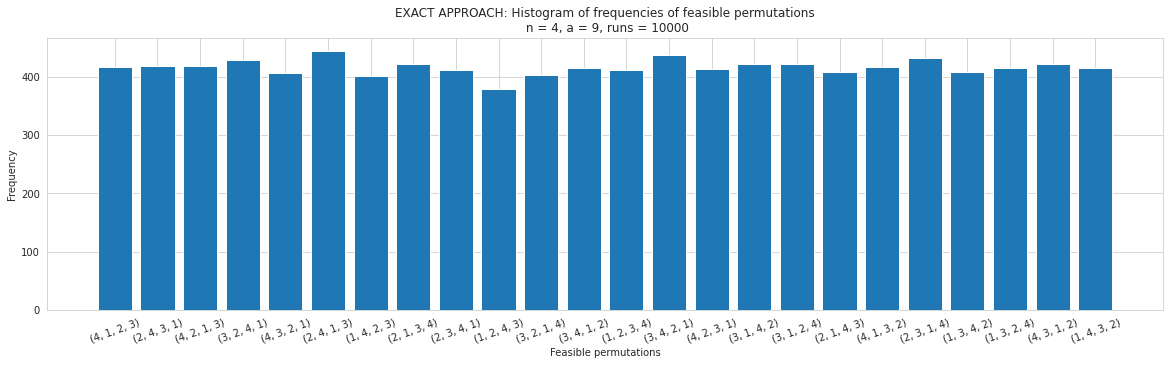

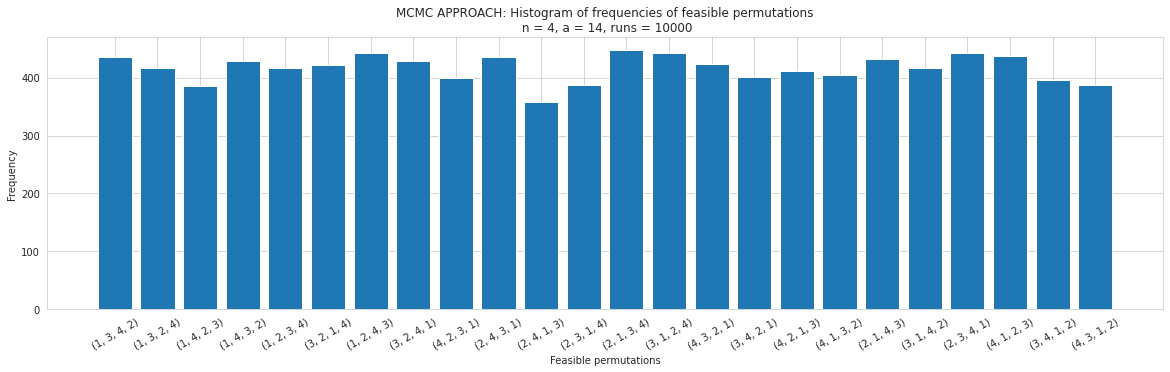

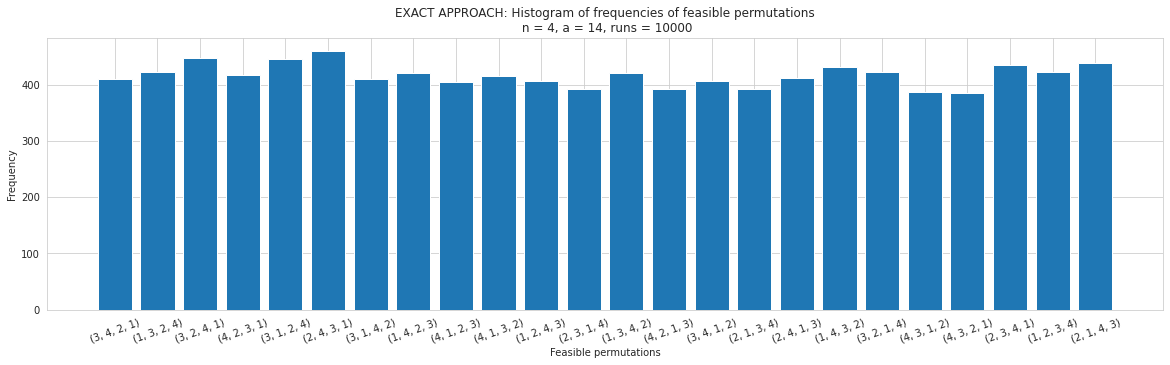

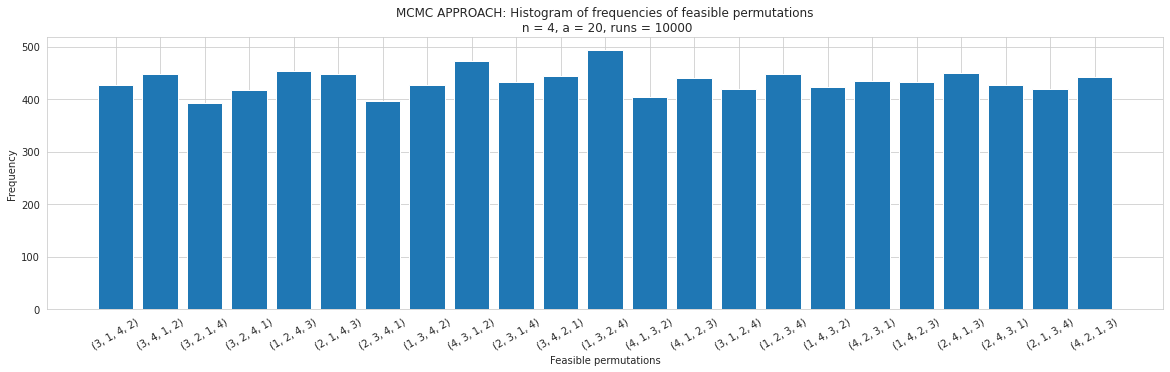

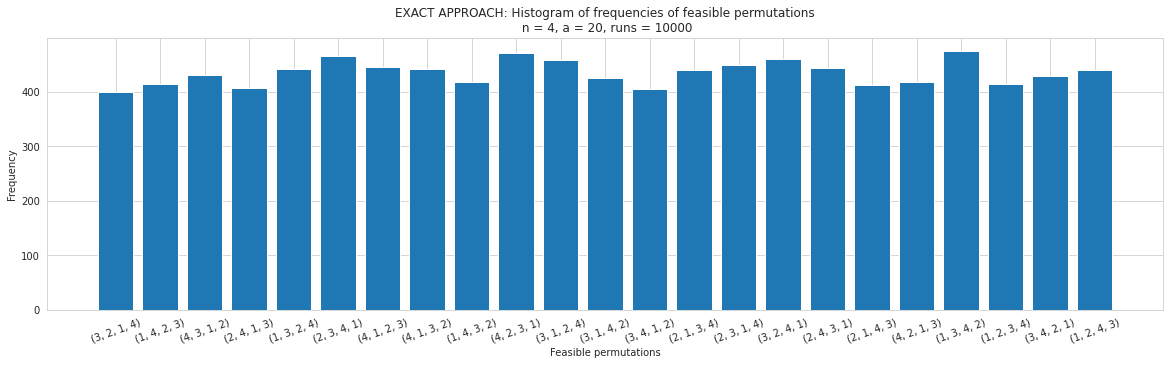

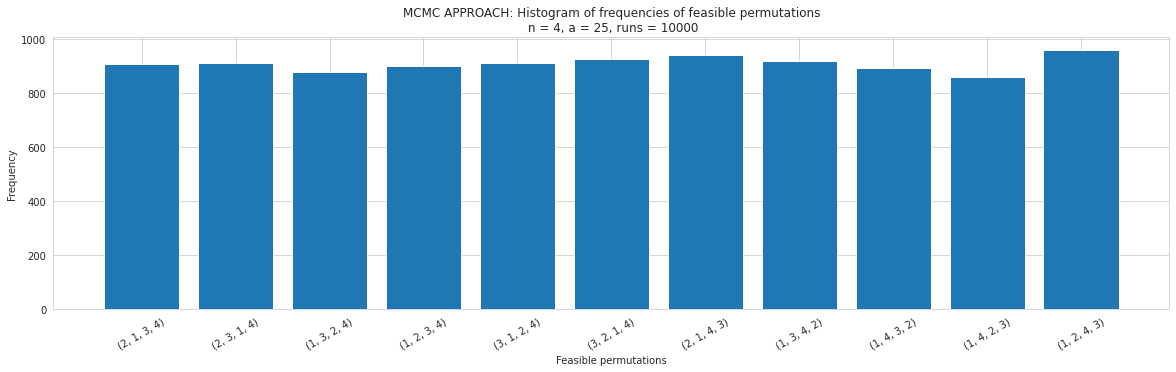

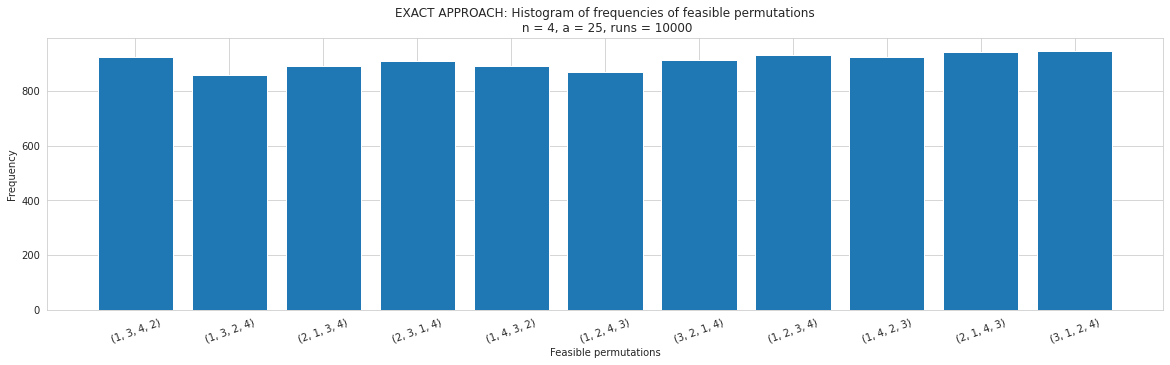

In [21]:
a = 9
n = 4
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 20)
plt.show()
print("\n")
print("\n")


a = 14
n = 4
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 20)
plt.show()
print("\n")
print("\n")


a = 20
n = 4
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 20)
plt.show()
print("\n")
print("\n")

a = 25
n = 4
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 20)
plt.show()
print("\n")
print("\n")

###*Comments:*
>- We observe that as $a$ increases, the number of feasible permutations decreases, and hence the number of bars seem to decrease.
>- We observe that in both the approaches, the plots come out to be very similar, with the distribution of sampled feasible permutation being uniform. 
>- The frequency of the feasible permutations changes. As $a$ increases, the size of the feasible set decreases, implying $\frac{1}{\mathcal{|P|}}$ increases ($\mathcal{P}$ being the set of feasible permutations). So we see the y-axis range reaching highest for the largest selection of $a$ value.
>- Limit distribution of the Markov chain is uniformly distributed over $\mathcal{P}$ with probability $\frac{1}{\mathcal{|P|}}$.

#### *Fixing $a = 28$ and varying $n = 4,5,6$:*

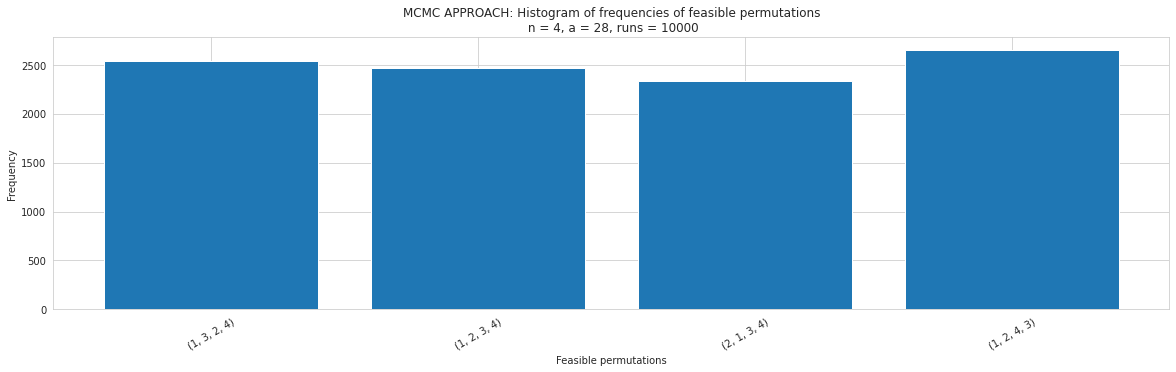

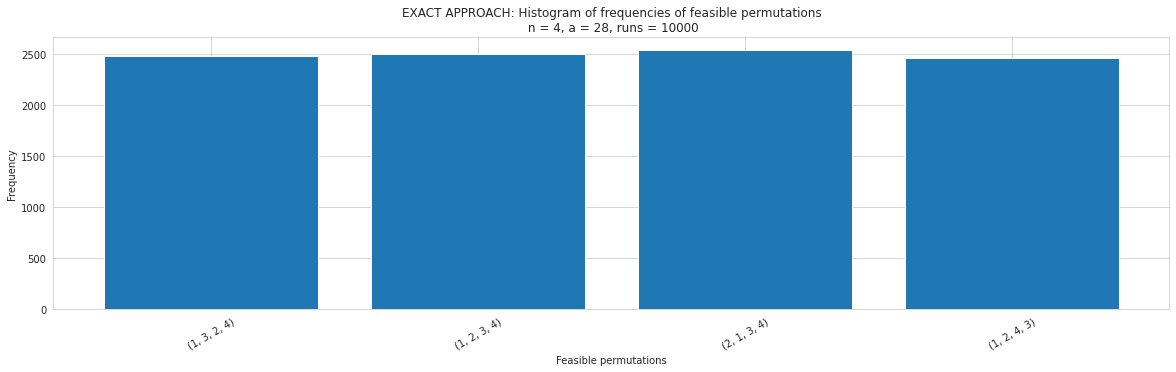

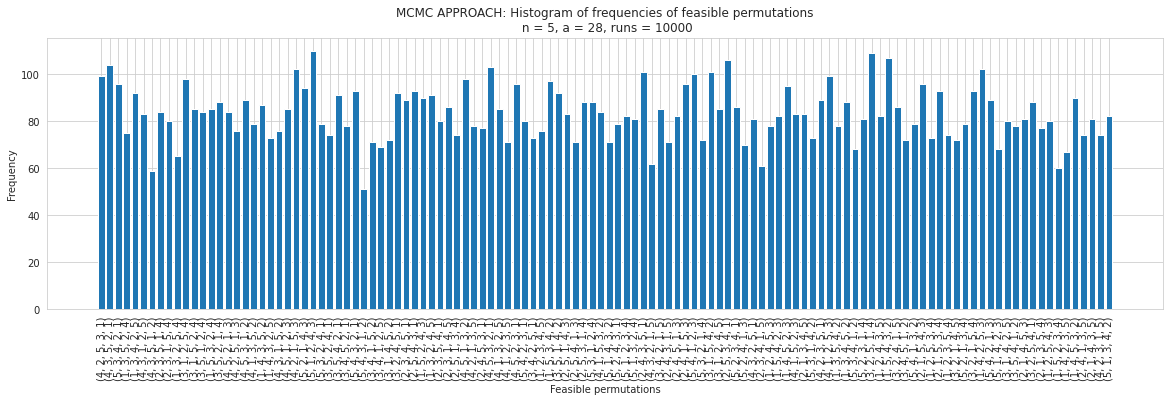

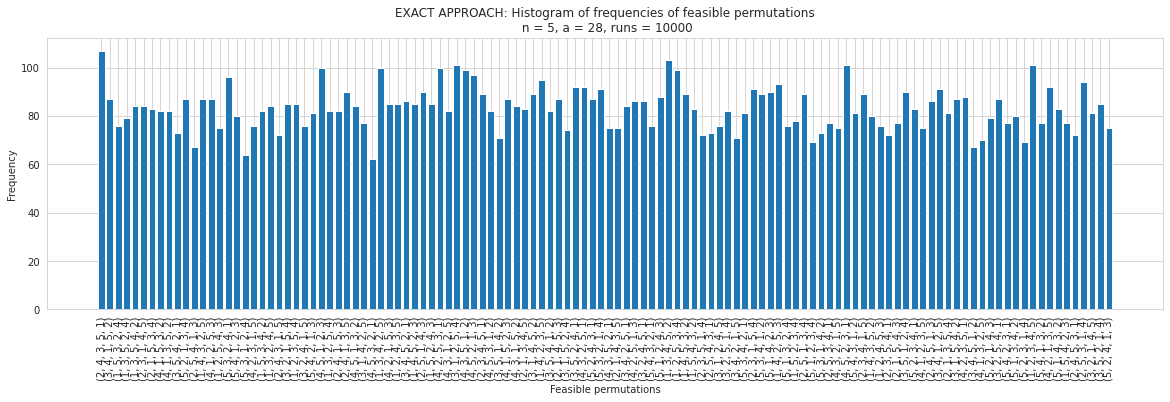

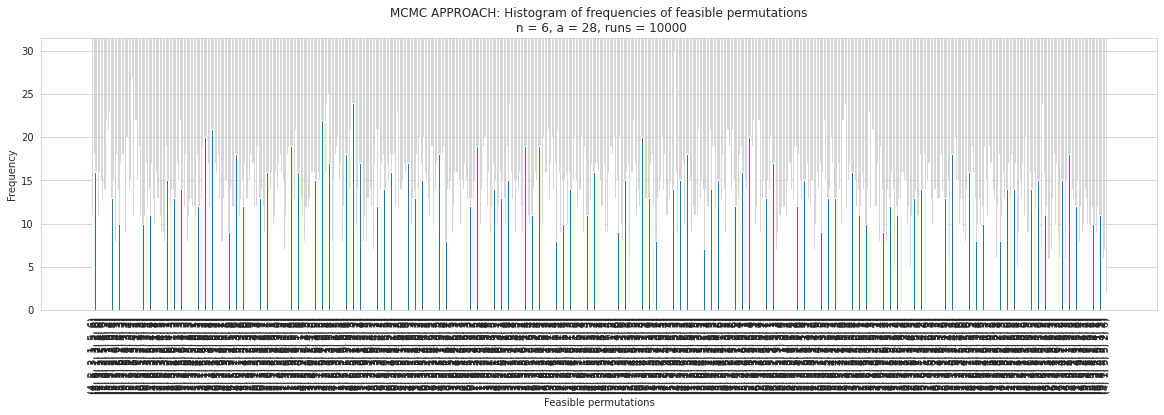

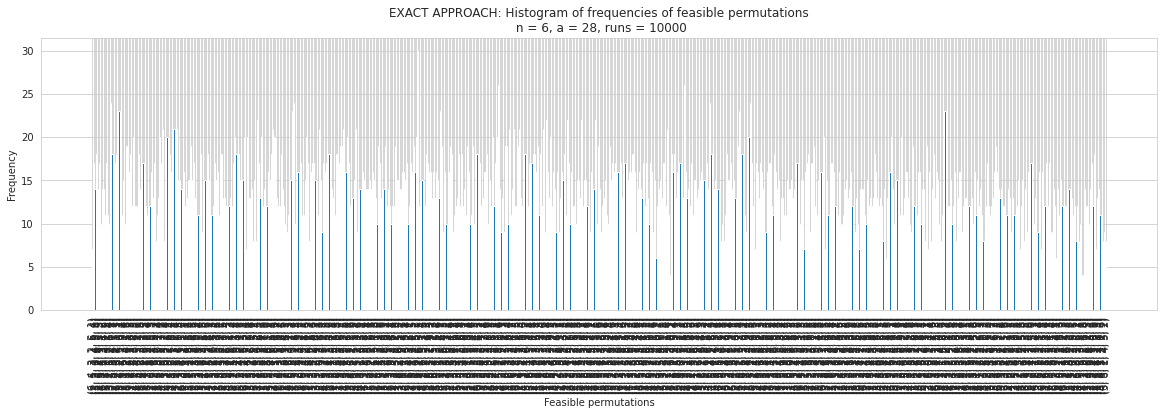

In [22]:
a = 28
n = 4
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 30)
plt.show()
print("\n")
print("\n")


a = 28
n = 5
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 90)
plt.show()
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 90)
plt.show()
print("\n")
print("\n")


a = 28
n = 6
X_states =  mcmc_approach(a, n, runs)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 90)
plt.show()
reqd_freq = get_frequency(runs,a,n)
plt.figure(figsize = (20,5))
permut_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permut_list , reqd_freq.values(), align='center')
plt.title(f"EXACT APPROACH: Histogram of frequencies of feasible permutations\n n = {n}, a = {a}, runs = {runs}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permut_list, rotation = 90)
plt.show()

###*Comments:*
- We observe that as $n$ increases, the number of feasible permutations increases, and hence the number of bars seem to increase.
- We observe that in both the approaches, the plots come out to be very similar, with the distribution of sampled feasible permutation being uniform. 
- The frequency of the feasible permutations changes. As $n$ increases, the size of the feasible set increases, implying $\frac{1}{\mathcal{|P|}}$ decreases ($\mathcal{P}$ being the set of feasible permutations). So we see the y-axis range reaching highest for the lowest selection of $n$ value.
- Limit distribution of the Markov chain is uniformly distributed over $\mathcal{P}$ with probability $\frac{1}{\mathcal{|P|}}$.